# Modelo DecisionTree con preprocesado sin la columna Departamento

## Consideraciones iniciales
Le damos permiso a kaggle.json para que se pueda acceder en cualquier momento en el entorno de ejecución.

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json

## Librerías

Importamos las librerías necesarias para trabajar con datos y vectores.

*   Pandas: Para trabajar con Dataframes.
*   Numpy: Para trabajar con vectores ya sea numéricos o categóricos.
*   train_test_split: Para obtener la partición de los datos de train y de test.
*   DecisionTreeClassifier: Para realizar predicciones de datos con un modelo de Árbol de decisión.
*   matplotlib: Para realizar una gráfica de las primeras predicciones y visualizar su comportamiento.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

## Carga de archivos

Cargamos los archivos train1.csv y test1.csv los cuales contienen los datos preprocesados de la primera forma que implementamos y las guardamos en 2 variables que almacenan Dataframes de pandas con los datos de los csv.

In [44]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

Verificamos los primeros 5 datos de train

In [45]:
train.head()

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,0,904256,20212,enfermeria,BOGOTÁ,7.0,2.0,4.0,8.0,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,True
1,1,645256,20212,derecho,ATLANTICO,5.0,1.0,4.0,9.0,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False
2,2,308367,20203,otros,BOGOTÁ,5.0,5.0,4.0,7.0,Si,...,0.0,0.0,0.0,1.0,0.0,0.0,True,False,False,True
3,3,470353,20195,administracion de empresas,SANTANDER,6.0,1.0,5.0,2.0,Si,...,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,True
4,4,989032,20212,psicologia,ANTIOQUIA,5.0,4.0,4.0,5.0,Si,...,0.0,0.0,0.0,0.0,1.0,0.0,True,False,False,True


Verificamos los primeros 5 datos de test

In [46]:
test.head()

,ID,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,...,"('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,ESTU_PAGOMATRICULAPROPIO_no info,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,550236,2.0,2.0,4.0,9.0,Si,No,N,Si,Si,...,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1
1,98545,5.0,4.0,3.0,7.0,Si,No,N,Si,Si,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
2,499179,4.0,1.0,4.0,6.0,Si,No,N,Si,Si,...,0.0,0.0,1.0,0.0,0.0,1,0,0,0,1
3,782980,4.0,4.0,2.0,4.0,Si,No,N,No,No,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
4,785185,5.0,3.0,3.0,7.0,Si,No,N,Si,Si,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1


Observamos las columnas de train

In [47]:
train.columns

Index(['Unnamed: 0', 'ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD',
       'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL',
       'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1',
       'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',

Observamos las columnas de test

In [48]:
test.columns

Index(['ID', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'coef_1', 'coef_2',
       'coef_3', 'coef_4', '('administracion de empresas',)',
       '('administracion en salud ocupacional',)',
       '('administracion financiera',)', '('arquitectura',)',
       '('comunicacion social',)', '('contaduria publica',)', '('derecho',)',
       '('economia',)', '('enfermeria',)', '('ingenieria ambiental',)',
       '('ingenieria civil',)', '('ingenieria de sistemas',)',
       '('ingenieria electronica',)', '('ingenieria industrial',)',
       '('ingenieria mecanica',)', '('licenciatura en pedagogia infantil',)',
       '('medicina',)', '('negocios internacionales',)', '('otros',)',
       '('psicologia',)', '('trabajo social',)', 'ESTU_PAGOMATRICULAPROPIO_No',
       'ESTU

## Obtención de los datos de Train

Al dataset que queremos enviar como entrenamiento (Valores x) le quitamos la columna rendimiento global que será nuestra variable predicción $y$


In [49]:
X = train.drop('RENDIMIENTO_GLOBAL', axis = 1)

Por lo tanto, X queda con la siguiente forma

In [50]:
X.shape

(686002, 44)

In [51]:
X = X.drop(columns=['ESTU_PRGM_ACADEMICO',
                    'ESTU_PRGM_DEPARTAMENTO',
                    'ESTU_PRIVADO_LIBERTAD',
                    'FAMI_TIENELAVADORA',
                    'FAMI_TIENEAUTOMOVIL',
                    'FAMI_TIENECOMPUTADOR',
                    'FAMI_TIENEINTERNET.1',
                    'Unnamed: 0'])

In [54]:
banderas = [
    'ESTU_PAGOMATRICULAPROPIO_No', 'ESTU_PAGOMATRICULAPROPIO_Si',
    'FAMI_TIENEINTERNET_No', 'FAMI_TIENEINTERNET_Si'
]

for col in banderas:
    X[col] = X[col].astype(int)


In [55]:
X.head()

,ID,PERIODO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,904256,20212,7.0,2.0,4.0,8.0,12.0,0.322,0.208,0.310,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
1,645256,20212,5.0,1.0,4.0,9.0,8.0,0.311,0.215,0.292,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
2,308367,20203,5.0,5.0,4.0,7.0,7.0,0.297,0.214,0.305,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,470353,20195,6.0,1.0,5.0,2.0,7.0,0.485,0.172,0.252,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
4,989032,20212,5.0,4.0,4.0,5.0,5.0,0.316,0.232,0.285,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1


A nuestra variable $y$ le llevamos entonces los datos de train pero solamente la columna 'RENDIMIENTO_GLOBAL' que es nuestra variable predicción

In [56]:
y = train['RENDIMIENTO_GLOBAL'].values

Verificamos los valores únicos de X

In [57]:
np.unique(X)

array([0.00000e+00, 1.00000e-03, 2.00000e-03, ..., 9.89283e+05,
       9.89284e+05, 9.89286e+05])

Verificamos los valores únicos de  y  y podemos observar que hay solo 4 datos, del 1 al 4. Estos datos son correctos ya que son 4 categorías diferentes las que queremos predecir.

In [58]:
np.unique(y)

array([1., 2., 3., 4.])

## Obtención de los datos de Test

A las $X$ de test, les vamos a quitar 2 columnas.
*   ID: Porque el ID contiene solo etiquetas, y no queremos que estos datos se relaciones con dichas etiquetas.
*   ESTU_PAGOMATRICULAPROPIO_noinfo ya que estos datos en los cuales no hay información aportan ruido al modelo.

In [59]:
Xtest = test.drop(['ID', 'ESTU_PAGOMATRICULAPROPIO_no info'], axis = 1)

Por lo tanto, $X_{test}$ va a tener la siguiente forma:

In [60]:
Xtest.shape

(296786, 39)

In [62]:
Xtest = Xtest.drop(columns=['ESTU_PRIVADO_LIBERTAD',
                    'FAMI_TIENELAVADORA',
                    'FAMI_TIENEAUTOMOVIL',
                    'FAMI_TIENECOMPUTADOR',
                    'FAMI_TIENEINTERNET.1'])

In [63]:
Xtest.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,"('administracion de empresas',)",...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
0,2.0,2.0,4.0,9.0,5.0,0.328,0.219,0.317,0.247,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
1,5.0,4.0,3.0,7.0,9.0,0.227,0.283,0.296,0.324,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
2,4.0,1.0,4.0,6.0,7.0,0.285,0.228,0.294,0.247,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
3,4.0,4.0,2.0,4.0,4.0,0.160,0.408,0.217,0.294,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
4,5.0,3.0,3.0,7.0,7.0,0.209,0.283,0.306,0.286,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1


Y los siguientes valores únicos:

In [64]:
np.unique(Xtest)

array([0.00e+00, 1.00e-03, 2.00e-03, 3.00e-03, 4.00e-03, 5.00e-03,
       6.00e-03, 7.00e-03, 8.00e-03, 9.00e-03, 1.00e-02, 1.10e-02,
       1.20e-02, 1.30e-02, 1.40e-02, 1.50e-02, 1.60e-02, 1.70e-02,
       1.80e-02, 1.90e-02, 2.00e-02, 2.10e-02, 2.20e-02, 2.30e-02,
       2.40e-02, 2.50e-02, 2.60e-02, 2.70e-02, 2.80e-02, 2.90e-02,
       3.00e-02, 3.10e-02, 3.20e-02, 3.30e-02, 3.40e-02, 3.50e-02,
       3.60e-02, 3.70e-02, 3.80e-02, 3.90e-02, 4.00e-02, 4.10e-02,
       4.20e-02, 4.30e-02, 4.40e-02, 4.50e-02, 4.60e-02, 4.70e-02,
       4.80e-02, 4.90e-02, 5.00e-02, 1.01e-01, 1.02e-01, 1.03e-01,
       1.04e-01, 1.05e-01, 1.06e-01, 1.07e-01, 1.08e-01, 1.09e-01,
       1.10e-01, 1.11e-01, 1.12e-01, 1.13e-01, 1.14e-01, 1.15e-01,
       1.16e-01, 1.17e-01, 1.18e-01, 1.19e-01, 1.20e-01, 1.21e-01,
       1.22e-01, 1.23e-01, 1.24e-01, 1.25e-01, 1.26e-01, 1.27e-01,
       1.28e-01, 1.29e-01, 1.30e-01, 1.31e-01, 1.32e-01, 1.33e-01,
       1.34e-01, 1.35e-01, 1.36e-01, 1.37e-01, 1.38e-01, 1.39e

Decidimos que el test_size, o el tamaño de datos de test sería el 30% del dataset y utilizamos el train_test_split para obtener los respectivos datos particionados.

In [65]:
test_size = 0.3

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
print (Xtr.shape, Xts.shape)

(480201, 36) (205801, 36)


In [70]:
columnas_a_eliminar = [
    'ID',
    'PERIODO'
]

Xtr = Xtr.drop(columns=columnas_a_eliminar)
Xts = Xts.drop(columns=columnas_a_eliminar)

In [71]:
Xtr.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,coef_1,coef_2,coef_3,coef_4,"('administracion de empresas',)",...,"('licenciatura en pedagogia infantil',)","('medicina',)","('negocios internacionales',)","('otros',)","('psicologia',)","('trabajo social',)",ESTU_PAGOMATRICULAPROPIO_No,ESTU_PAGOMATRICULAPROPIO_Si,FAMI_TIENEINTERNET_No,FAMI_TIENEINTERNET_Si
457432,5.0,2.0,0.0,2.0,2.0,0.010,0.001,0.024,0.003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
233656,5.0,2.0,3.0,7.0,6.0,0.211,0.304,0.290,0.296,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
88304,4.0,5.0,4.0,4.0,6.0,0.289,0.218,0.298,0.288,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
423205,5.0,1.0,3.0,12.0,11.0,0.234,0.312,0.266,0.288,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1
374057,5.0,5.0,6.0,9.0,8.0,0.532,0.126,0.223,0.181,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1


## Instanciación del modelo de Árbol de decisión



Instanciamos en una variable estimator un objeto de tipo DecisionTree que agrupa todos los métodos y atributos necesarios para aplicar un modelo de Árbol de decisión a nuestros datos.

In [72]:
estimator = DecisionTreeClassifier(random_state=0)

## Entrenamiento del modelo

In [73]:
estimator.fit(Xtr, ytr)

DecisionTreeClassifier(random_state=0)

## Métricas de desempeño

In [74]:
estimator.score(Xtr, ytr), estimator.score(Xts,yts)


(1.0, 0.31529001316806043)

Con el modelo ahora entrenado, vamos a hacer las predicciones correspondientes con los datos Test

In [75]:
predicciones = estimator.predict(Xtest)

Debemos redondear las predicciones ya que nos deben dar entero, dado que solo tenemos 4 categorias: 1, 2, 3, 4

In [76]:
predicciones = np.round(predicciones)

Verificamos el formato de las 10 primeras predicciones de nuestro modelo.

In [77]:
predicciones[:10]

array([1., 3., 4., 1., 3., 1., 4., 2., 2., 2.])

## Gráfica
Graficamos el comportamiento de las primeras 10 predicciones.

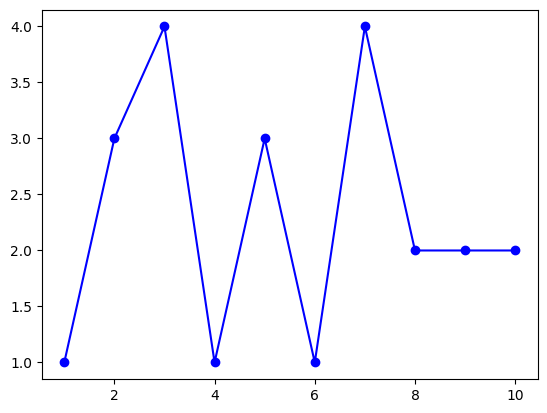

In [78]:
plt.plot(range(1, 11), predicciones[:10], 'b-o')

## Preparación de datos para someterlos a Kaggle

Traemos los diferentes IDs de los estudiantes que estaban registrados en el Dataset de Test

In [79]:
idTest = pd.DataFrame(test["ID"])

En Reference guardamos los nombres de las categorías con las que estamos trabajando. Nótese que el primer elemento es un String vacío. Dicho elemento se ubicó dado que nuestro modelo, predice con salidas de 1 a 4, por lo que el elemento 0 no deberia existir, y dado que no lo utilizamos ponemos un String genérico que rellene el espacio 0 del arreglo.

También, a y_predictionReference le llevamos los datos de reference dependiendo los datos que haya en predicciones. Por lo tanto, quedan del formato String correcto dichas predicciones.

Por último, este arreglo de datos se lleva a idTest con el objetivo de formar el dataframe completo que se enviará a Kaggle.

In [80]:
Reference = [' ','bajo', 'medio-bajo', 'medio-alto', 'alto']
y_preditionReference = [Reference[int(i)] for i in predicciones]

idTest['RENDIMIENTO_GLOBAL'] = pd.Series(y_preditionReference, name='RENDIMIENTO_GLOBAL')

Observamos el Dataframe

In [81]:
idTest.head()

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,medio-alto
2,499179,alto
3,782980,bajo
4,785185,medio-alto


In [82]:
idTest.shape

(296786, 2)

Exportamos el Dataframe a un archivo csv para enviarlo a Kaggle

In [83]:
idTest.to_csv('submissionDt.csv', index = False)

In [84]:
!head submissionDt.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,medio-alto
499179,alto
782980,bajo
785185,medio-alto
58495,bajo
705444,alto
557548,medio-bajo
519909,medio-bajo


Enviamos el archivo a Kaggle para participar en la competencia

In [85]:
#!kaggle competitions submit -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia -f submissionDt.csv -m "Envío de predicciones usando un DecissionTreeClassifier con preprocesado sin departamento"

100% 4.22M/4.22M [00:00<00:00, 13.6MB/s]
Successfully submitted to UDEA/ai4eng 20251 - Pruebas Saber Pro Colombia